# 5. アルキメデスコピュラ

### **図5.5** クレイトンコピュラから生成した乱数$\{(u_i, v_i), i=1,2,...,500\}$の散布図

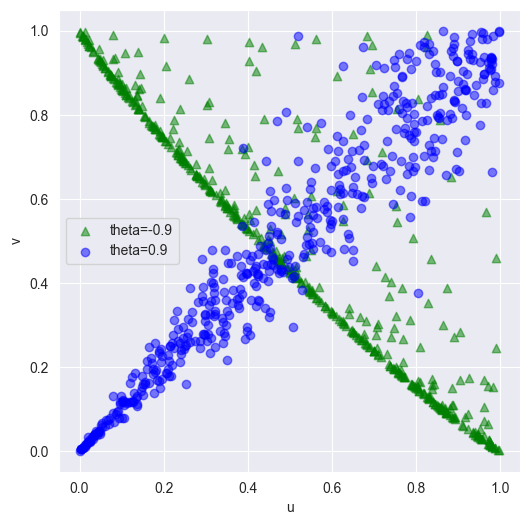

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

# 逆関数法によるクレイトンコピュラの乱数生成
def rand_Claytoncopula(n_samples = 500,  theta=1.0):
  U = np.random.uniform(size=(n_samples, 1))
  W = np.random.uniform(size=(n_samples, 1))
  V = [( 1 + (w**(-theta/(theta+1))-1) * u**(-theta) )**(-1/theta) for u, w in zip(U, W)]

  return U, V

# データの生成
U1, V1 = rand_Claytoncopula(theta=-0.9)
U2, V2 = rand_Claytoncopula(theta=9.0)

# グラフの作成
fig_contour = plt.figure(figsize=(6, 6))

ax1 = fig_contour.add_subplot(1, 1, 1)
ax1.scatter(U1, V1, marker='^', color='green', alpha=0.5,label="theta=-0.9")
ax1.scatter(U2, V2, marker='o', color='blue', alpha=0.5,label="theta=0.9")
ax1.set_xlabel('u')
ax1.set_ylabel('v')
ax1.legend()
ax1.set_aspect('equal', adjustable='box')
ax1.grid(True)

- (補足)プロットを分けて描く

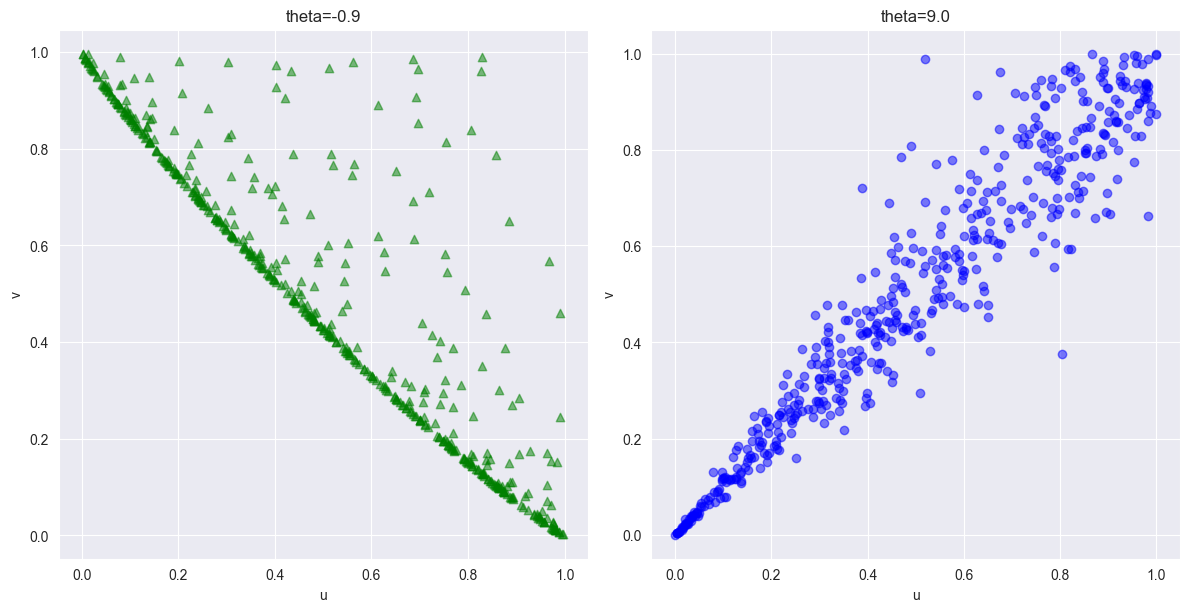

In [2]:
# グラフの作成
fig_contour = plt.figure(figsize=(12, 6))

ax1 = fig_contour.add_subplot(1, 2, 1)
ax1.scatter(U1, V1, marker='^', color='green', alpha=0.5)
ax1.set_xlabel('u')
ax1.set_ylabel('v')
ax1.set_title('theta=-0.9')
ax1.set_aspect('equal', adjustable='box')
ax1.grid(True)

ax2 = fig_contour.add_subplot(1, 2, 2)
ax2.scatter(U2, V2, marker='o', color='blue', alpha=0.5)
ax2.set_xlabel('u')
ax2.set_ylabel('v')
ax2.set_title('theta=9.0')
ax2.set_aspect('equal', adjustable='box')
ax2.grid(True)

plt.tight_layout()
plt.show()

### **図5.6** グンベルコピュラとGBコピュラから生成した乱数$\{(u_i, v_i), i=1,2,...,500\}$の散布図

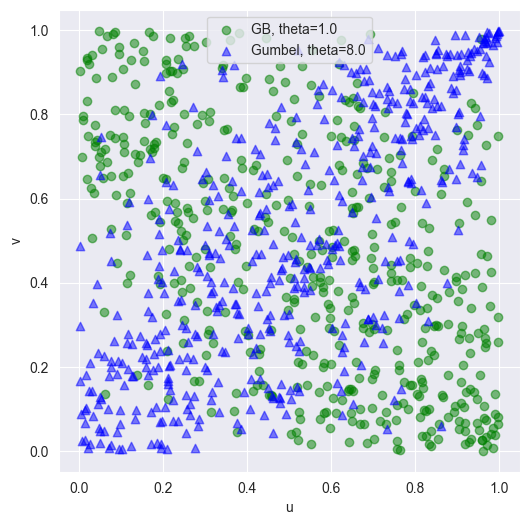

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import bisect
import seaborn as sns
sns.set_style("darkgrid")

# GBコピュラにおける条件付き分布関数
def GBcopula_partial_derivative_pdf(u, v, theta=1.0):
  return (1- theta*np.log(v)) * u ** (-theta*np.log(v)) * v

# 逆関数法によるGBコピュラの乱数生成
def rand_GBcopula(n_samples = 500,  theta=1.0):
  U = np.random.uniform(size=(n_samples, 1))
  W = np.random.uniform(size=(n_samples, 1))
  V = [bisect(lambda v:GBcopula_partial_derivative_pdf(u, v) - w , a=1e-11, b=0.9999999) for u, w in zip(U, W)]
  return U, V

# グンベルコピュラにおける条件付き分布関数
def Gumbelcompula_partial_derivative_pdf(u, v, theta=1.0):
  mole = (-np.log(u))**theta * np.exp( -( (-np.log(u))**(theta+1) +(-np.log(v))**(theta+1) )**(1/(theta+1)) )
  denom = u * ( (-np.log(u))**(theta+1) + (-np.log(v))**(theta+1) )**(theta/(theta+1))
  return mole/denom

# 逆関数法によるグンベルコピュラの乱数生成
def rand_Gumbelcopula(n_samples = 500,  theta=1.0):
  U = np.random.uniform(size=(n_samples, 1))
  W = np.random.uniform(size=(n_samples, 1))
  V = [bisect(lambda v:Gumbelcompula_partial_derivative_pdf(u, v) - w , a=1e-11, b=0.9999999) for u, w in zip(U, W)]
  return U, V

# データの生成
U3, V3 = rand_GBcopula(theta = 1.0)
U4, V4 = rand_Gumbelcopula(theta = 8.0)

# グラフの作成
fig_contour = plt.figure(figsize=(6, 6))

ax1 = fig_contour.add_subplot(1, 1, 1)
ax1.scatter(U3, V3, marker='o', color='green', alpha=0.5,label="GB, theta=1.0")
ax1.scatter(U4, V4, marker='^', color='blue', alpha=0.5,label="Gumbel, theta=8.0")
ax1.set_xlabel('u')
ax1.set_ylabel('v')
ax1.legend()
ax1.set_aspect('equal', adjustable='box')
ax1.grid(True)

- (補足)プロットを分けて描く

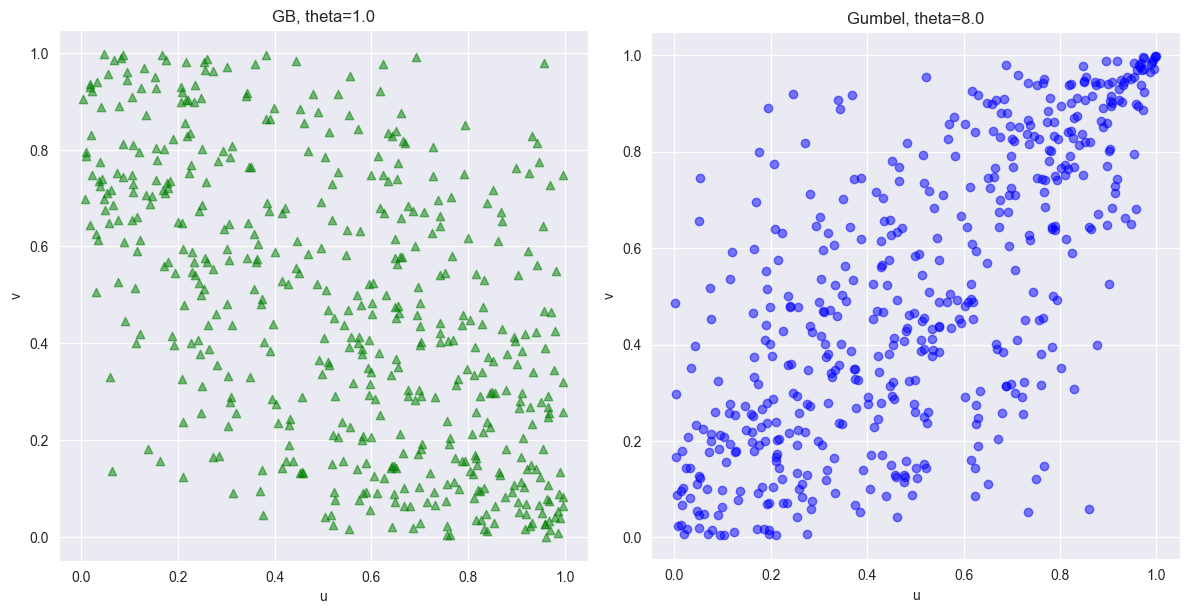

In [4]:
# グラフの作成
fig_contour = plt.figure(figsize=(12, 6))

ax1 = fig_contour.add_subplot(1, 2, 1)
ax1.scatter(U3, V3, marker='^', color='green', alpha=0.5)
ax1.set_xlabel('u')
ax1.set_ylabel('v')
ax1.set_title('GB, theta=1.0')
ax1.set_aspect('equal', adjustable='box')
ax1.grid(True)

ax2 = fig_contour.add_subplot(1, 2, 2)
ax2.scatter(U4, V4, marker='o', color='blue', alpha=0.5)
ax2.set_xlabel('u')
ax2.set_ylabel('v')
ax2.set_title('Gumbel, theta=8.0')
ax2.set_aspect('equal', adjustable='box')
ax2.grid(True)

plt.tight_layout()
plt.show()